# Retention Study - Figuring Out Which Employees May Quit
### Loading our Main HR Database Records

In [1]:
# basic operations
import numpy as np

# for dataframe manipulations
import pandas as pd 

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for missing values
import missingno as mno

# for date time manipulation
import datetime

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# setting up the background style for the plots
plt.style.use('fivethirtyeight')

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
hr_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Human Resources Retention/hr_data.csv")

In [5]:
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [6]:
# View the bottom 5 rows
hr_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [7]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [8]:
# View which columns are categorical
hr_df.select_dtypes(exclude=['int', 'float']).columns

Index(['department', 'salary'], dtype='object')

In [9]:
# Display values in categorical columns
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [11]:
hr_df.shape

(14999, 9)

### Loading our Evaluation and Employee Satisfaction Data

In [12]:
emp_satis_eval = pd.read_excel ('/content/drive/MyDrive/Colab Notebooks/Human Resources Retention/employee_satisfaction_evaluation (7).xlsx') 

In [13]:
emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [14]:
emp_satis_eval.shape

(14999, 3)

### Merge or Join Tables

In [15]:
main_df = hr_df.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


## Cleaning Data

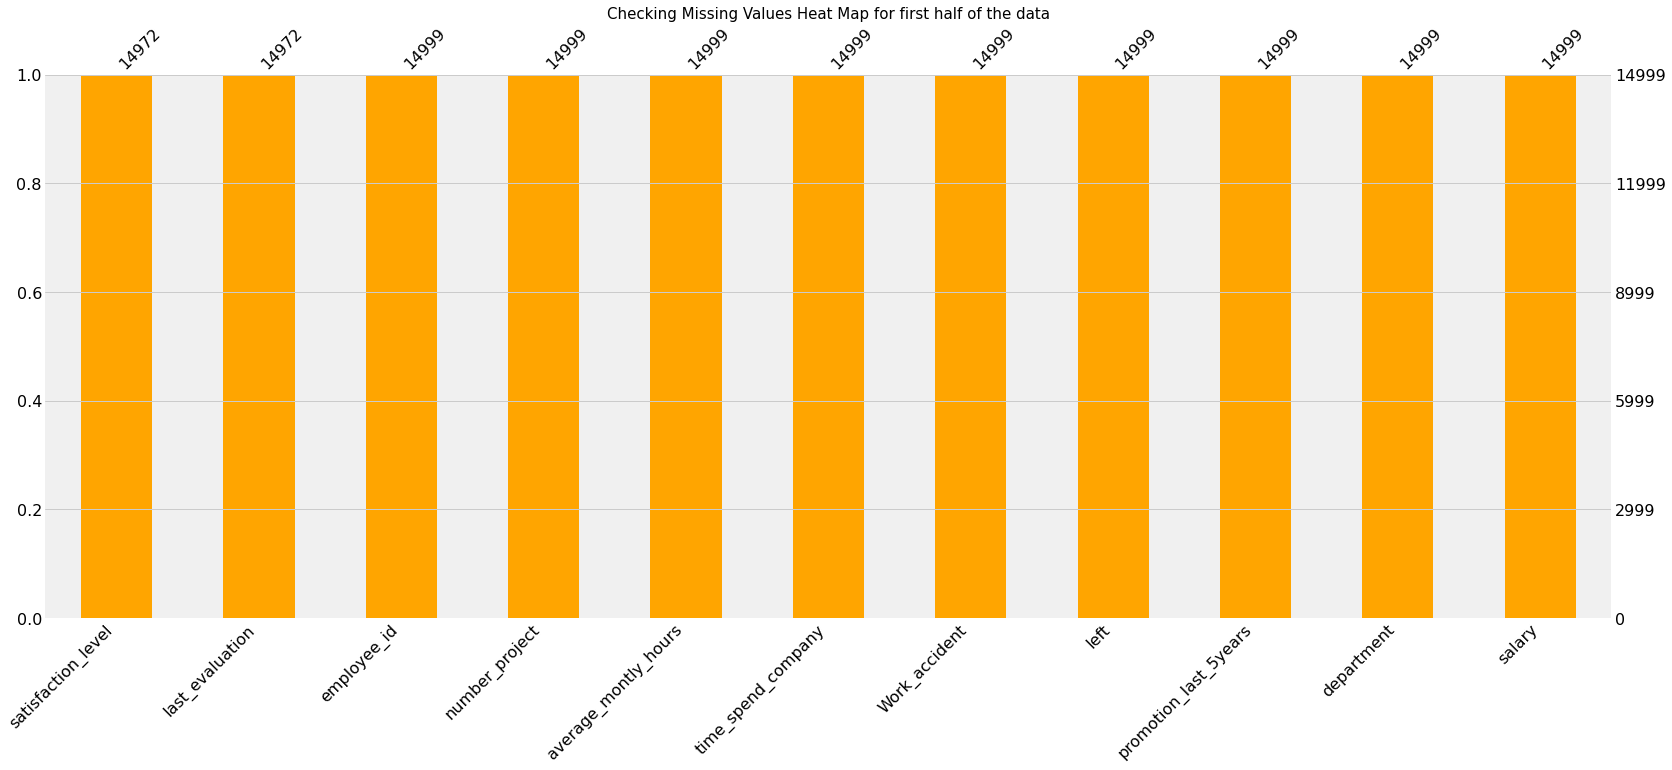

In [16]:
# checking if the data contains any NULL value
# Visualize missing values as a matrix 
mno.bar(main_df.iloc[:, :],
        color = 'orange',
        sort = 'ascending') 
plt.title('Checking Missing Values Heat Map for first half of the data', fontsize = 15)
plt.show()

In [17]:
main_df.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

### Is our dataset good? Are there missing values?

In [18]:
#main_df.isnull()
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


### Let's fill in the missing blanks with the aveage values

In [19]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
main_df.fillna(main_df.mean(), inplace=True)
main_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [21]:
main_df.isnull().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

In [23]:
# Removing employee ID
main_df_final = main_df.drop(columns='employee_id')
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [24]:
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [25]:
main_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [26]:
main_df_final['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [27]:
main_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

## Data Visualization

### Displaying Your Correlation Matrix

No handles with labels found to put in legend.


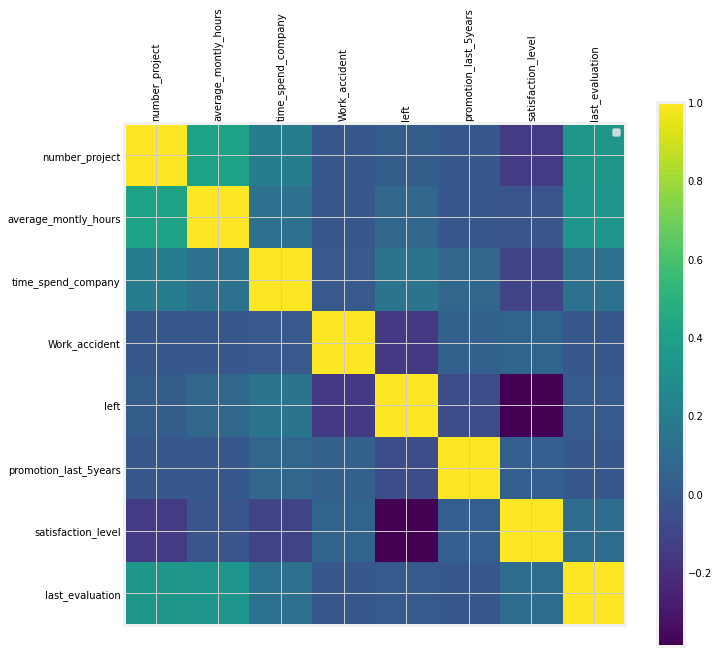

In [28]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(main_df_final)

## Preparing out  Dataset for ML

In [29]:
# Perform One Hot Encoding on Categorical Data

categorial = ['department','salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorial, drop_first=True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [30]:
# How many columns do we now have?

len(main_df_final.columns)

19

In [31]:
# How many employees in the dataset have left?

len(main_df_final.loc[main_df_final['left'] == 1])

3571

In [32]:
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


## Preparing our Dataset for Machine Learning

In [33]:
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = main_df_final.drop(['left'],axis=1).values

# We assigned those label values to our Y dataset
y = main_df_final['left'].values


In [34]:
# Split it to a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.651959,-1.718770,1.729011,-0.414443,-0.142168,-0.782687,0.089734,-0.239376,-0.238039,-0.227118,-0.205145,-0.247498,-0.251804,1.629223,-0.419323,-0.470814,-0.97600,-0.864751
1,0.166224,1.247859,1.039573,-0.414443,-0.142168,0.590962,1.085634,-0.239376,-0.238039,-0.227118,-0.205145,-0.247498,-0.251804,-0.613789,2.384798,-0.470814,1.02459,-0.864751
2,-0.651959,1.468352,-1.028738,-0.414443,-0.142168,0.469758,1.085634,-0.239376,-0.238039,-0.227118,-0.205145,-0.247498,-0.251804,-0.613789,2.384798,-0.470814,-0.97600,-0.864751
3,-0.651959,-0.135231,-0.339301,-0.414443,-0.142168,0.914174,0.968469,4.177520,-0.238039,-0.227118,-0.205145,-0.247498,-0.251804,-0.613789,-0.419323,-0.470814,1.02459,-0.864751
4,-0.651959,-0.516082,-1.028738,-0.414443,-0.142168,0.752568,0.499810,4.177520,-0.238039,-0.227118,-0.205145,-0.247498,-0.251804,-0.613789,-0.419323,-0.470814,-0.97600,1.156402


In [37]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,1.118207e-15,-1.445331e-16,1.953227e-16,3.267539e-16,9.219694e-16,3.422486e-14,2.406368e-14,1.000523e-15,1.091501e-15,-9.762434e-16,1.334599e-15,2.385885e-16,3.116217e-16,-2.257668e-16,8.266028e-16,2.583576e-16,1.929434e-16,-3.278114e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.470142e+00,-2.099621e+00,-1.028738e+00,-4.144435e-01,-1.421683e-01,-2.115935e+00,-2.077813e+00,-2.393765e-01,-2.380392e-01,-2.271179e-01,-2.051447e-01,-2.474983e-01,-2.518040e-01,-6.137894e-01,-4.193227e-01,-4.708145e-01,-9.759999e-01,-8.647510e-01
25%,-6.519590e-01,-8.969333e-01,-3.393011e-01,-4.144435e-01,-1.421683e-01,-7.018844e-01,-9.061659e-01,-2.393765e-01,-2.380392e-01,-2.271179e-01,-2.051447e-01,-2.474983e-01,-2.518040e-01,-6.137894e-01,-4.193227e-01,-4.708145e-01,-9.759999e-01,-8.647510e-01
50%,1.662238e-01,-3.500727e-02,-3.393011e-01,-4.144435e-01,-1.421683e-01,1.061446e-01,3.115155e-02,-2.393765e-01,-2.380392e-01,-2.271179e-01,-2.051447e-01,-2.474983e-01,-2.518040e-01,-6.137894e-01,-4.193227e-01,-4.708145e-01,-9.759999e-01,-8.647510e-01
75%,9.844066e-01,8.870531e-01,3.501362e-01,-4.144435e-01,-1.421683e-01,8.333708e-01,9.098867e-01,-2.393765e-01,-2.380392e-01,-2.271179e-01,-2.051447e-01,-2.474983e-01,-2.518040e-01,1.629223e+00,-4.193227e-01,-4.708145e-01,1.024590e+00,1.156402e+00
max,2.620772e+00,2.189965e+00,4.486760e+00,2.412874e+00,7.033915e+00,1.560597e+00,1.671457e+00,4.177520e+00,4.200989e+00,4.403000e+00,4.874607e+00,4.040431e+00,3.971343e+00,1.629223e+00,2.384798e+00,2.123979e+00,1.024590e+00,1.156402e+00


## Let's Train a Logistic Regression Model

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 79.07%
[[3181  228]
 [ 714  377]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3409
           1       0.62      0.35      0.44      1091

    accuracy                           0.79      4500
   macro avg       0.72      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500



### Let's Try a Random Forest Classifer

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 99.04%
[[3401    8]
 [  35 1056]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3409
           1       0.99      0.97      0.98      1091

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [41]:
main_df_final.drop(['left'],axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [43]:

feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
5,0.301900
0,0.188917
2,0.180941
1,0.163608
6,0.120185
3,0.010156
16,0.008023
15,0.004081
17,0.004079
13,0.003812


### Can Deep Learning Make a Difference?

In [44]:
# Use the newest version of TensorFlow 2.0
%tensorflow_version 2.x 

In [45]:
# If you wish to use Tensorflow 1.X run the following line and then restart runtime
# %tensorflow_version 1.x 
# You'll need to change your import statements from tensorflow.keras to keras
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [46]:
# Display Model Summary and Show Parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 171       
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Start Training Our Classifier 
batch_size = 10
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 7s 6ms/step - loss: 0.4496 - accuracy: 0.7887 - val_loss: 0.3470 - val_accuracy: 0.8422
Epoch 2/25
1050/1050 [==============================] - 8s 7ms/step - loss: 0.3098 - accuracy: 0.8615 - val_loss: 0.2848 - val_accuracy: 0.8704
Epoch 3/25
1050/1050 [==============================] - 6s 5ms/step - loss: 0.2684 - accuracy: 0.8770 - val_loss: 0.2512 - val_accuracy: 0.9000
Epoch 4/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2458 - accuracy: 0.9041 - val_loss: 0.2337 - val_accuracy: 0.9207
Epoch 5/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2329 - accuracy: 0.9202 - val_loss: 0.2216 - val_accuracy: 0.9327
Epoch 6/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2240 - accuracy: 0.9303 - val_loss: 0.2130 - val_accuracy: 0.9369
Epoch 7/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2176 - accuracy: 0.9338 - val_loss: 0.2087 - val_accuracy:

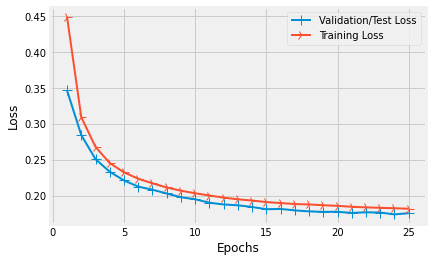

In [49]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

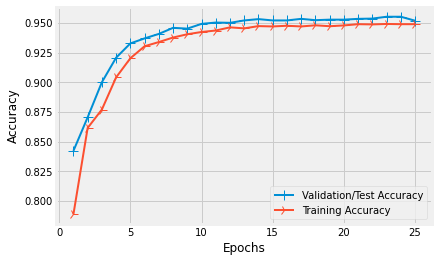

In [50]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## Displaying the Classification Report and Confusion Matrix

In [51]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3287  122]
 [  95  996]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3409
           1       0.89      0.91      0.90      1091

    accuracy                           0.95      4500
   macro avg       0.93      0.94      0.93      4500
weighted avg       0.95      0.95      0.95      4500



# Let's a Deeper Model

In [52]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(270, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(180, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(90, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 270)               5130      
                                                                 
 dropout (Dropout)           (None, 270)               0         
                                                                 
 dense_3 (Dense)             (None, 180)               48780     
                                                                 
 dropout_1 (Dropout)         (None, 180)               0         
                                                                 
 dense_4 (Dense)             (None, 90)                16290     
                                                                 
 dense_5 (Dense)             (None, 1)                 91        
                                                                 
Total params: 70,291
Trainable params: 70,291
Non-trai

In [53]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training our Deeper Model

In [54]:
batch_size = 10
epochs = 25

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 5s 4ms/step - loss: 0.6692 - accuracy: 0.9056 - val_loss: 0.2852 - val_accuracy: 0.9447
Epoch 2/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2796 - accuracy: 0.9387 - val_loss: 0.2491 - val_accuracy: 0.9471
Epoch 3/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2626 - accuracy: 0.9409 - val_loss: 0.2519 - val_accuracy: 0.9440
Epoch 4/25
1050/1050 [==============================] - 6s 5ms/step - loss: 0.2562 - accuracy: 0.9424 - val_loss: 0.2398 - val_accuracy: 0.9464
Epoch 5/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2484 - accuracy: 0.9437 - val_loss: 0.2485 - val_accuracy: 0.9418
Epoch 6/25
1050/1050 [==============================] - 5s 4ms/step - loss: 0.2482 - accuracy: 0.9414 - val_loss: 0.2276 - val_accuracy: 0.9513
Epoch 7/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2436 - accuracy: 0.9449 - val_loss: 0.2197 - val_accuracy:

In [55]:
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3326   83]
 [  93  998]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3409
           1       0.92      0.91      0.92      1091

    accuracy                           0.96      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500



# Building the **ANN**

In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [57]:
#Initializing the ANN
ann = tf.keras.models.Sequential()

In [58]:
#Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [59]:
#Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [60]:
#Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Training the ANN

In [61]:
#Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [62]:
#Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
329/329 [==============================] - 1s 2ms/step - loss: 0.5530 - accuracy: 0.7527
Epoch 2/100
329/329 [==============================] - 1s 2ms/step - loss: 0.3701 - accuracy: 0.8614
Epoch 3/100
329/329 [==============================] - 1s 2ms/step - loss: 0.2737 - accuracy: 0.8907
Epoch 4/100
329/329 [==============================] - 1s 2ms/step - loss: 0.2304 - accuracy: 0.9168
Epoch 5/100
329/329 [==============================] - 1s 2ms/step - loss: 0.2084 - accuracy: 0.9314
Epoch 6/100
329/329 [==============================] - 1s 2ms/step - loss: 0.1976 - accuracy: 0.9351
Epoch 7/100
329/329 [==============================] - 1s 2ms/step - loss: 0.1919 - accuracy: 0.9379
Epoch 8/100
329/329 [==============================] - 1s 2ms/step - loss: 0.1874 - accuracy: 0.9386
Epoch 9/100
329/329 [==============================] - 1s 2ms/step - loss: 0.1835 - accuracy: 0.9404
Epoch 10/100
329/329 [==============================] - 1s 2ms/step - loss: 0.1799 - accura

Predicting the Test set results

In [64]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)

Making the Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3328   81]
 [  92  999]]


0.9615555555555556